# How to produce gene set scores (like in the Pancancer immune paper).

David L Gibbs,
Jan 7, 2019
dgibbs (( at )) systemsbiology (( dot )) org

The first thing we need to do: download the Pancancer TCGA expression set.

It can be found at:  http://api.gdc.cancer.gov/data/3586c0da-64d0-4b74-a449-5ff4d9136611

I'm going to download it and put in the same folder as this notebook. It can take a while since it's 1.8 GBs

In [1]:
library(readr)

In [2]:
dat <- read_tsv('EBPlusPlusAdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.tsv')

Parsed with column specification:
cols(
  .default = col_double(),
  gene_id = col_character()
)
See spec(...) for full column specifications.


In [3]:
dat[1:5,1:5]

gene_id,TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J2-01A-11R-A29S-07,TCGA-OR-A5J3-01A-11R-A29S-07,TCGA-OR-A5J5-01A-11R-A29S-07
?|100130426,0.0000,0.0000,0.0000,0.0000
?|100133144,3.2661,2.6815,1.7301,0.0000
?|100134869,3.9385,8.9948,6.5650,1.5492
?|10357,149.1350,81.0777,86.4879,53.9117
?|10431,2034.1000,1304.9300,1054.6600,2350.8900


* We have gene symbols and entrez IDs in that first column, so we'll need to split them up. *

In [4]:
geneList <- strsplit(dat$gene_id, '\\|')
geneSymbols <- unlist(lapply(geneList, function(a) a[[1]]))                             
geneSymbols[5000:5005]
                        

[1] "DLGAP2" "DLGAP3" "DLGAP4" "DLGAP5" "DLK1"   "DLK2"

* Now I'm going to download the code from my github account. It contains everything we should need to produce scores.

* In a terminal, after changing directories to where the above data is located I'm going to clone the repo

git clone https://github.com/Gibbsdavidl/Immune-Subtype-Clustering

* I'm going to pull the code out from the files found in the Scripts/ directory

In [5]:
# let's work on a subset of the data, and compare to the reported scores #

# first to remove some duplicate symbols '?' and 'SLC35E2'
idx <- which(duplicated(geneSymbols))
gs2 <- geneSymbols[-idx]

# then make a smaller data set and give it row names
datSubset <- as.data.frame(dat[-idx,-1]) #  sample(x = 1:ncol(dat), size = 1000, replace = F)]) 
rownames(datSubset) <- gs2

rm(dat)
gc()

# just to have a look
dim(datSubset)
datSubset[1:5,1:5]


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,658822,35.2,2006908,107.2,6124604,327.1
Vcells,230299965,1757.1,583348083,4450.6,486047808,3708.3


[1] 20502 11069

,TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J2-01A-11R-A29S-07,TCGA-OR-A5J3-01A-11R-A29S-07,TCGA-OR-A5J5-01A-11R-A29S-07,TCGA-OR-A5J6-01A-31R-A29S-07
?,0.0000,0.0000,0.0000,0.0000,0.0000
A1BG,16.3305,9.5987,20.7377,1696.6600,600.1620
A1CF,0.0000,0.0000,0.5925,1.5492,0.0000
A2BP1,17.2911,5.6368,8.8876,6.1967,4.4709
A2LD1,182.3920,239.1580,138.8830,63.9349,237.3520


In [6]:
summary(as.numeric(datSubset[,1]))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0      2.4    130.6    856.4    787.2 434605.0 

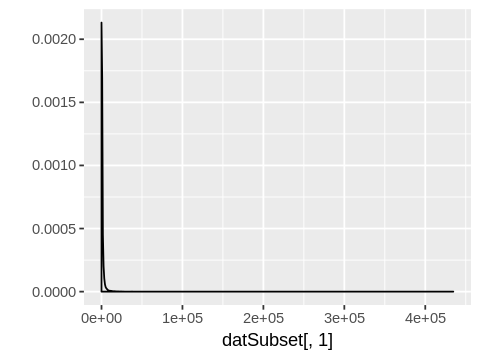

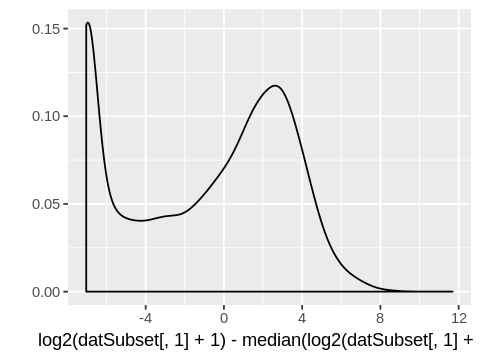

In [7]:
library(ggplot2)
options(repr.plot.width=4, repr.plot.height=3)

# OK
# so in order to get the data in to the form we need, there's a few transforms to do.

# 1. log2
# 2. median scaled.  (median will be zero)


## Before...
qplot(datSubset[,1], geom='density')

## And After!
qplot(log2(datSubset[,1]+1) - median(log2(datSubset[,1]+1)), geom='density')



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,824611,44.1,2006908,107.2,6124604,327.1
Vcells,230602311,1759.4,1574903418,12015.6,1592240378,12147.9


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-7.0405 -5.2743  0.0000 -0.9602  2.5820 11.6889 

,TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J2-01A-11R-A29S-07,TCGA-OR-A5J3-01A-11R-A29S-07,TCGA-OR-A5J5-01A-11R-A29S-07,TCGA-OR-A5J6-01A-31R-A29S-07
?,-7.0404980,-7.3003343,-7.22611351,-7.534132,-7.1076879
A1BG,-2.9252566,-3.8945188,-2.78398611,3.195200,2.1239221
A1CF,-7.0404980,-7.3003343,-6.55482013,-6.184087,-7.1076879
A2BP1,-2.8474280,-4.5698465,-3.92049313,-4.686796,-4.6559097
A2LD1,0.4782889,0.6075058,-0.09803668,-1.513209,0.7892621


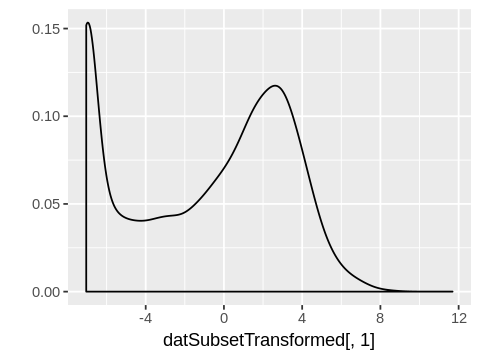

In [8]:

# apply the transforms #
# first the log2
datSubsetTransformed <- apply(datSubset, 2, function(a) log2(a+1))

# running out of memory! #
rm(datSubset)
gc()                              

# then the median scale
datSubsetTransformed <- apply(datSubsetTransformed, 2, function(a) a - median(a, na.rm=T))
                              
# should look like the above plot #                              
qplot(datSubsetTransformed[,1], geom='density')
                         
summary(datSubsetTransformed[,1])
                              
datSubsetTransformed[1:5,1:5]                              

In [9]:

# and we use the scoring code to produce scores #
load('Immune-Subtype-Clustering/shiny-app/Immune-Subtype-Clustering/data/comparative_immuneSigs_geneLists4.rda')
source('Immune-Subtype-Clustering/Scripts/ImmuneSigs68_function.R')
scores <- ImmuneSigs_function(datSubsetTransformed, 
                              sigs1_2_eg2,
                              sigs12_weighted_means,
                              sigs12_module_weights,
                              sigs1_2_names2,
                              sigs1_2_type2)


[1] "DONE MEAN"
[1] "DONE MEDIAN"
[1] "DONE WEIGHTED MEAN"
[1] "DONE MODULES"
GP11_Immune_IFN 
[1] "DONE ZHANG"
[1] "DONE KEGG"
[1] "DONE CD8 RATIO"
[1] "DONE TAMsurr"
[1] "DONE CHANG CORE"
CSR_Activated_15701700 
[1] "DONE CSR"
B_cell_PCA_16704732 
CD8_PCA_16704732 
GRANS_PCA_16704732 
LYMPHS_PCA_16704732 
T_cell_PCA_16704732 
TGFB_PCA_17349583 
Rotterdam_ERneg_PCA_15721472 
HER2_Immune_PCA_18006808 
[1] "DONE PCA"
[1] "DONE DONE"


In [10]:
scores[1:5,1:5]


,TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J2-01A-11R-A29S-07,TCGA-OR-A5J3-01A-11R-A29S-07,TCGA-OR-A5J5-01A-11R-A29S-07,TCGA-OR-A5J6-01A-31R-A29S-07
ICS5_score,-4.3198,-3.7471,-2.8823,-4.8005,-3.2381
LIexpression_score,-2.9509,-2.3325,-4.1236,-3.7251,-1.9746
Chemokine12_score,-3.9021,-1.9931,-4.6967,-5.5043,-3.0471
NHI_5gene_score,-0.4468,-0.6149,-0.2635,-0.4808,0.4888
CD68,2.1496,2.3727,2.0296,0.7814,4.1830


### Now we can compare this to the reported scores. ###

The reported signature scores can be found on our iAtlas synapse page:
https://www.synapse.org/#!Synapse:syn10337516/files/

I'm going to download them and put them in the same directory as this notebook.

In [11]:
reportedScores <- read.table('Scores_160_Signatures.tsv', header=T, sep='\t', stringsAsFactors = F)

In [12]:
reportedScores[1:5,1:5]


,Source,SetName,TCGA.02.0047.01A.01R.1849.01,TCGA.02.0055.01A.01R.1849.01,TCGA.02.2483.01A.01R.1849.01
Angiogenesis,Yasin,Angiogenesis,0.1925055,0.09855802,0.2027224
APM1,Yasin,APM1,0.4492857,0.46742753,0.4380520
APM2,Yasin,APM2,0.2437349,0.29939846,0.2658848
ICS5_score,Wolf,ICS5_score,-1.5192000,0.61780000,-2.0130000
LIexpression_score,Wolf,LIexpression_score,-1.8586000,-0.73840000,-1.2881000


* Of course!  The column names have dots.  Have to fix that.

In [13]:
library(stringr)
x <- str_replace_all(colnames(reportedScores), pattern='\\.', replacement='-')
colnames(reportedScores) <- x

# did we get them matched?
sum(colnames(scores) %in% colnames(reportedScores))

# close  <crying face emoji>

[1] 9129

In [14]:
# 
# Then we need to get these into a comparible form #
#

sharedIDs <- intersect(colnames(reportedScores), colnames(scores))
genesets  <- intersect(reportedScores$SetName, rownames(scores))
length(sharedIDs)
length(genesets)

scores2 <- scores[genesets,sharedIDs]
reportedScores2 <- reportedScores[genesets,sharedIDs]

dim(scores2)
dim(reportedScores2)

scores2[1:5,1:5]

reportedScores2[1:5,1:5]

[1] 9129

[1] 67

[1]   67 9129

[1]   67 9129

,TCGA-02-0047-01A-01R-1849-01,TCGA-02-0055-01A-01R-1849-01,TCGA-02-2483-01A-01R-1849-01,TCGA-02-2485-01A-01R-1849-01,TCGA-02-2486-01A-01R-1849-01
ICS5_score,-4.3141,-1.1465,-4.8887,-3.0821,-3.2717
LIexpression_score,-4.0035,-2.3230,-3.0388,-2.9855,-1.3758
Chemokine12_score,-3.5305,-0.5590,-2.8034,-1.6772,-1.1263
NHI_5gene_score,1.0632,1.1671,0.8851,2.4057,2.1335
CD68,4.0139,5.0628,4.2867,2.6852,5.8033


,TCGA-02-0047-01A-01R-1849-01,TCGA-02-0055-01A-01R-1849-01,TCGA-02-2483-01A-01R-1849-01,TCGA-02-2485-01A-01R-1849-01,TCGA-02-2486-01A-01R-1849-01
ICS5_score,-1.5192,0.6178,-2.0130,-0.6860,-0.9120
LIexpression_score,-1.8586,-0.7384,-1.2881,-1.1057,-0.1263
Chemokine12_score,-1.7224,0.2789,-1.3137,-0.4585,-0.1713
NHI_5gene_score,-0.1660,0.4680,-0.3830,0.8730,1.3250
CD68,0.4500,1.1190,0.5440,-0.4910,1.5750


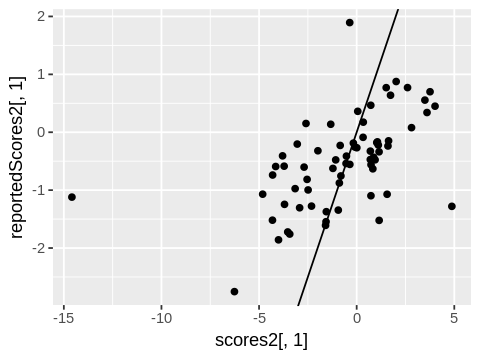

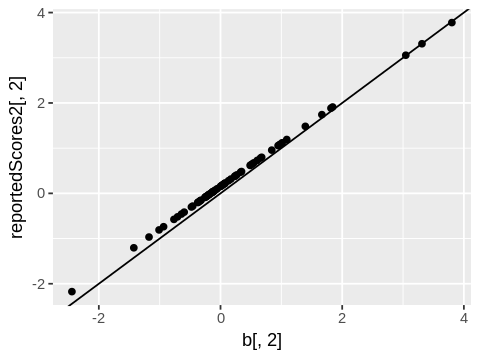

In [15]:

# comparing the raw computed scores with reported scores #
qplot(x=scores2[,1], y=reportedScores2[,1]) + geom_abline()

# this function is defined in the ImmuneSigs68_function.R file #
zscore.cols2<-function(x){
    return((apply(x, 2, function(x) (x - median(na.omit(x)))/sd(na.omit(x)))))
}

# now let's apply the normalization #
b <- zscore.cols2(reportedScores2)

# and replot #
qplot(x=b[,2], y=reportedScores2[,2]) + geom_abline()
                  


Looks like that's it.  When I've seen deviations from y=x, it's been from using a different sample group, moving the Z scores off diagonal.

So, the reported signature scores were Z-score normalized across the 9129 samples.

In the iAtlas code, I return scores prior to normalization... so that new-sample scores can be added to the signature matrix, and normalized together.